<a href="https://colab.research.google.com/github/RYLiang18/Richard-CMSC-320-Final-Project-F2020/blob/main/richard_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CMSC 320 Final Project (Replace this title)**

## By: Richard Liang

## **Part 1: Gathering Data**

### **1.1 Loading in Data Part I**

The dataset that I use is "Iowa Liquor Sales - 12 million alcoholic beverage sales in the Midwest", a CSV which can be found [here](https://www.kaggle.com/residentmario/iowa-liquor-sales) on Kaggle. 

Because this dataset contains over 12 million rows of data, which is around 3.4GB, I decided that it would be a good idea to take a random sample of 0.5% of the original CSV to analyze. By doing this, I can whittle down our original dataset to 62,955 rows, or around 17 MB of data, which allows my code to perform a lot faster.

To sample from the original dataset to create a smaller one, I wrote a Python script, which uses the Pandas library. The code is detailed below:



```
import pandas as pd

# read in the humongous CSV into a Pandas dataframe
full_data = pd.read_csv('Iowa_Liquor_Sales.csv')

# a random 0.5% sample of full_data without replacement
sampled_data = full_data.sample(frac=0.005)

# export sampled_data into another CSV
sampled_data.to_csv('iowa_liquor_sales_sample.csv', index=False)
```

After creating `iowa_liquor_sales_sample.csv`, I then uploaded the file to GitHub so it could be accessible online [here](https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv) instead of locally



### **1.2 Loading in Data Part II**

#### **1.2.1 Imports**

Here, we will be using the `pandas` data analysis library so that we can read in our CSV dataset and save it as a **dataframe**, allowing us to do various forms of data parsing and management. 

Additionally, we will also be using the `numpy` library. The main purpose of numpy here in this section will be to help us identify which rows in our pandas dataframe having missing attributes, which will be marked with `np.nan`

Both of these libraries, including all (or at least most) of the libraries used in this tutorial can be installed using the [Anaconda](https://docs.anaconda.com/) package manager

In [1]:
import pandas as pd
import numpy as np

#### **1.2.2 Reading in data from CSV to Pandas Dataframe**

As mentioned earlier, the dataset I will be using in this tutorial is `iowa_liquor_sales_sample.csv`, which I saved on GitHub. Because of this, instead of having to download the dataset, I can access it directly from the internet

In [2]:
# save unmodified csv into all_data
all_data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')

# create another dataframe called data 
data = pd.read_csv('https://raw.githubusercontent.com/RYLiang18/Richard-CMSC-320-Final-Project-F2020/main/iowa_liquor_sales_sample.csv')

Here, we can see what the dataframe looks like without making any modifications and tidying up data, and we can already notice some inconsistancies. For example, on rows 2 and 3, the `city` attribute is "DES MOINES" in all caps; however, on row 62954, the `city` attribue is "Des Moines", written normally. While these are clearly the same cities in our heads, to make our code work, we need to tidy it up, which is done in section 1.3

In [3]:
all_data

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-01582800052,11/14/2016,2629,Hy-Vee Food Store #2 / Council Bluffs,1745 Madison Ave,Council Bluffs,51503,1745 Madison Ave\nCouncil Bluffs 51503\n(41.24...,78.0,POTTAWATTA,1011200.0,Straight Bourbon Whiskies,421.0,SAZERAC COMPANY INC,16518,Ancient Age Bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46
1,INV-04183000098,04/05/2017,4509,A J'S LIQUOR II,2515 Chamberlain,Ames,50010,"2515 Chamberlain\nAmes 50010\n(42.021461, -93....",85.0,STORY,1062300.0,Aged Dark Rum,259.0,Heaven Hill Brands,43991,Admiral Nelson Black Patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19
2,S04167100031,02/20/2012,2627,Hy-Vee Wine and Spirits #1,3424 MARTIN LUTHER KING JR PKW,DES MOINES,50310,3424 MARTIN LUTHER KING JR PKW\nDES MOINES 503...,77.0,Polk,1031080.0,VODKA 80 PROOF,55.0,Sazerac North America,35316,Barton Vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38
3,S11597500006,04/11/2013,4617,Lickety Liquor,2501 HUBBELL AVE,DES MOINES,50317,2501 HUBBELL AVE\nDES MOINES 50317\n(41.607817...,77.0,Polk,1031080.0,VODKA 80 PROOF,300.0,Mccormick Distilling Company,36903,Mccormick Vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54
4,INV-02904200001,01/25/2017,5264,Casey's General Store # 2177/Mitchel,"309, Center Ave",Mitchellville,50169.0,"309, Center Ave\nMitchellville 50169\n(41.6634...",77.0,POLK,1012100.0,Canadian Whiskies,115.0,CONSTELLATION BRANDS INC,11776,Black Velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,INV-02566000014,01/05/2017,3899,Wal-Mart 3762 / WDM,6365 Stagecoach Dr,West Des Moines,50266.0,6365 Stagecoach Dr\nWest Des Moines 50266\n(41...,77.0,POLK,1031000.0,American Vodka,205.0,E & J Gallo Winery,36971,New Amsterdam Vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46
62951,S11087500015,03/13/2013,4202,Fareway Stores #829 / Sioux City,4267 SERGEANT RD,SIOUX CITY,51106,4267 SERGEANT RD\nSIOUX CITY 51106\n(42.451213...,97.0,Woodbury,1012300.0,IRISH WHISKIES,370.0,Pernod Ricard USA/Austin Nichols,15626,Jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59
62952,S22496800024,11/20/2014,4214,New Star Liquor / Lafayet / Waterloo,1309 LAFAYETTE ST,WATERLOO,50703,"1309 LAFAYETTE ST\nWATERLOO 50703\n(42.494092,...",7.0,Black Hawk,1031200.0,VODKA FLAVORED,260.0,Diageo Americas,77740,Smirnoff Raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59
62953,INV-00081700023,09/01/2016,4057,Tequila's Liquor Store,1434 Des Moines St Ste 5,Des Moines,50316.0,1434 Des Moines St Ste 5\nDes Moines 50316\n(4...,77.0,POLK,1070000.0,Cocktails / RTD,395.0,PROXIMO,58888,Jose Cuervo Authentic Lime Margarita 4pk Cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21


### **1.3 Tidying Data**

The next step is to tidy up our data and make sure that all aspects of our dataframe that we plan on using are in the right format and are easily accessible.

To do this we will:

1. Drop the columns (attributes) that we do not plan on using
2. Ensure that there are no inconsistencies in the columns that we do plan on using
3. Make sure that the columns that we plan on using contain variables in the right format. 
4. Deal with the rows (observations) that have missing attributes



#### **Dropping unused columns**

Because we will primarily be analyzing the price of different types of liquor and the locations of their sales, some of the attributes that we can defintiely drop are `Invoice/Item Number`, `Store Name`, `Address`, and `Store Number`. We may end up using some of the other attributes, so we won't delete them.

You may be wondering that if we care about the location of these liquor sales, why are we deleting the address? This is because the addresses are already stored in the `Store Location` attribute. Later on, when we plot a **heatmap** of all of our liquor sales, we will care mostly about the longitude and latitude of the stores that sales occurred at. These coordinates are also included in the `Store Location` attribute.

In [4]:
# Let's drop unused columns
data = data.drop(
  ['Invoice/Item Number', 'Store Name', 'Address', 'Store Number'],
  axis = 1
)

#### **Removing/Minimizing Inconsistencies**

To minimize inconsistencies, we'll have to make sure that observations with the same specific attribute are labeled as such.

**Removing Inconsistencies in `dtype: numpy.object` Columns by Converting to Lowercase**

In [5]:
data['City'] = data['City'].str.lower()

In [6]:
for col_name in data.columns:
  if (data[col_name].dtype == np.object):
    data[col_name] = data[col_name].str.lower()

**Removing Inconsistencies in County Names**

To remove inconsistencies in county names, we will cross reference county names with their respective county numbers. 

For example, Polk County is County Number 77; therefore, we will make sure that every liquor sale that takes place in County 77 will be labled `polk` all in **lower case**.

In [7]:
# Remove entries that are missing the 'County Number' and 'County' Attribute
data = data.dropna(subset=['County Number', 'County'])
# making county to lower case
data["County"] = data["County"].str.lower()

In [8]:
county_dict = dict()
county_dict[78.0] = 'pottawattamie'

In [9]:
for i, row in data.iterrows():
  county_number = row['County Number']
  
  if county_number in county_dict:
    data.at[i, 'County'] = county_dict[county_number]
  else:
    county_dict[county_number] = row['County']
  

In [10]:
data

,Date,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/14/2016,council bluffs,51503,1745 madison ave\ncouncil bluffs 51503\n(41.24...,78.0,pottawattamie,1011200.0,straight bourbon whiskies,421.0,sazerac company inc,16518,ancient age bourbon,6,1750,$11.80,$17.70,1,$106.20,1.75,0.46
1,04/05/2017,ames,50010,"2515 chamberlain\names 50010\n(42.021461, -93....",85.0,story,1062300.0,aged dark rum,259.0,heaven hill brands,43991,admiral nelson black patch,12,750,$6.96,$10.44,1,$125.28,0.75,0.19
2,02/20/2012,des moines,50310,3424 martin luther king jr pkw\ndes moines 503...,77.0,polk,1031080.0,vodka 80 proof,55.0,sazerac north america,35316,barton vodka,12,750,$3.37,$5.05,12,$60.60,9.00,2.38
3,04/11/2013,des moines,50317,2501 hubbell ave\ndes moines 50317\n(41.607817...,77.0,polk,1031080.0,vodka 80 proof,300.0,mccormick distilling company,36903,mccormick vodka,48,200,$1.13,$1.70,48,$81.60,9.60,2.54
4,01/25/2017,mitchellville,50169.0,"309, center ave\nmitchellville 50169\n(41.6634...",77.0,polk,1012100.0,canadian whiskies,115.0,constellation brands inc,11776,black velvet,12,750,$5.23,$7.85,1,$94.20,0.75,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,01/05/2017,west des moines,50266.0,6365 stagecoach dr\nwest des moines 50266\n(41...,77.0,polk,1031000.0,american vodka,205.0,e & j gallo winery,36971,new amsterdam vodka,6,1750,$14.00,$21.00,1,$119.88,1.75,0.46
62951,03/13/2013,sioux city,51106,4267 sergeant rd\nsioux city 51106\n(42.451213...,97.0,woodbury,1012300.0,irish whiskies,370.0,pernod ricard usa/austin nichols,15626,jameson,12,750,$13.90,$20.85,3,$62.55,2.25,0.59
62952,11/20/2014,waterloo,50703,"1309 lafayette st\nwaterloo 50703\n(42.494092,...",7.0,black hawk,1031200.0,vodka flavored,260.0,diageo americas,77740,smirnoff raspberry,12,750,$8.25,$12.38,3,$37.14,2.25,0.59
62953,09/01/2016,des moines,50316.0,1434 des moines st ste 5\ndes moines 50316\n(4...,77.0,polk,1070000.0,cocktails / rtd,395.0,proximo,58888,jose cuervo authentic lime margarita 4pk cans,6,800,$3.88,$5.82,1,$34.92,0.80,0.21


#### **Ensuring that Attribute Values are in the Right Format**



Because we will be plotting attributes like `State Bottle Retail` and `Sale (Dollars)` later on against time and location, it is necessary for us to convert these 

**Converting `State Bottle Retail` into float**

In [11]:
data['State Bottle Retail'] = data['State Bottle Retail'].str.replace('$', '')

In [12]:
data["State Bottle Retail"] = pd.to_numeric(data["State Bottle Retail"], downcast="float")

**Converting `Sale (Dollars)` into float**

In [13]:
data['Sale (Dollars)'] = data['Sale (Dollars)'].str.replace('$', '')
data['Sale (Dollars)'] = pd.to_numeric(data['Sale (Dollars)'], downcast="float")

**Converting `State Bottle Cost` into float**

In [14]:
data['State Bottle Cost'] = data['State Bottle Cost'].str.replace('$', '')
data['State Bottle Cost'] = pd.to_numeric(data['State Bottle Cost'], downcast="float")

**Converting `Date` to `datetime`**

In [15]:
data['Date']= pd.to_datetime(data['Date'])

#### **Removing Outliers**



In [16]:
data_nofliers = data.copy(deep = True)

In [17]:
def remove_outliers(attribute_name):
  global data_nofliers
  q1 = data_nofliers[attribute_name].quantile(0.25)
  q3 = data_nofliers[attribute_name].quantile(0.75)
  iqr = q3-q1
  # we consider outliers that are out of the range [q1-1.5*iqr, q3+1.5*iqr]
  data_nofliers[attribute_name] = data_nofliers[attribute_name][
    data_nofliers[attribute_name].between(q1-1.5*iqr, q3+1.5*iqr)
  ]
  data_nofliers = data_nofliers.dropna(subset = [attribute_name])

In [18]:
remove_outliers('State Bottle Retail')
# data_nofliers['State Bottle Retail'] = data_nofliers['State Bottle Retail'][
#   data_nofliers['State Bottle Retail'].between(data_nofliers['State Bottle Retail'].quantile(.15), data_nofliers['State Bottle Retail'].quantile(.85))
# ]

In [19]:
remove_outliers('Pack')
# data_nofliers['Sale (Dollars)'] = data_nofliers['Sale (Dollars)'][
#   data_nofliers['Sale (Dollars)'].between(data['Sale (Dollars)'].quantile(.15), data['Sale (Dollars)'].quantile(.85))
# ]

In [20]:
remove_outliers('Bottles Sold')

In [21]:
# data = data.dropna(subset=['State Bottle Retail', 'Sale (Dollars)'])

In [22]:
data_nofliers

,Date,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-11-14,council bluffs,51503,1745 madison ave\ncouncil bluffs 51503\n(41.24...,78.0,pottawattamie,1011200.0,straight bourbon whiskies,421.0,sazerac company inc,16518,ancient age bourbon,6.0,1750,11.80,17.700001,1.0,106.199997,1.75,0.46
1,2017-04-05,ames,50010,"2515 chamberlain\names 50010\n(42.021461, -93....",85.0,story,1062300.0,aged dark rum,259.0,heaven hill brands,43991,admiral nelson black patch,12.0,750,6.96,10.440000,1.0,125.279999,0.75,0.19
2,2012-02-20,des moines,50310,3424 martin luther king jr pkw\ndes moines 503...,77.0,polk,1031080.0,vodka 80 proof,55.0,sazerac north america,35316,barton vodka,12.0,750,3.37,5.050000,12.0,60.599998,9.00,2.38
4,2017-01-25,mitchellville,50169.0,"309, center ave\nmitchellville 50169\n(41.6634...",77.0,polk,1012100.0,canadian whiskies,115.0,constellation brands inc,11776,black velvet,12.0,750,5.23,7.850000,1.0,94.199997,0.75,0.19
7,2017-03-27,independence,50644,200 1st st east\nindependence 50644\n(42.46872...,10.0,buchanan,1092000.0,imported distilled spirits specialty,434.0,luxco inc,75087,juarez gold dss,12.0,1000,4.92,7.380000,1.0,88.559998,1.00,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62950,2017-01-05,west des moines,50266.0,6365 stagecoach dr\nwest des moines 50266\n(41...,77.0,polk,1031000.0,american vodka,205.0,e & j gallo winery,36971,new amsterdam vodka,6.0,1750,14.00,21.000000,1.0,119.879997,1.75,0.46
62951,2013-03-13,sioux city,51106,4267 sergeant rd\nsioux city 51106\n(42.451213...,97.0,woodbury,1012300.0,irish whiskies,370.0,pernod ricard usa/austin nichols,15626,jameson,12.0,750,13.90,20.850000,3.0,62.549999,2.25,0.59
62952,2014-11-20,waterloo,50703,"1309 lafayette st\nwaterloo 50703\n(42.494092,...",7.0,black hawk,1031200.0,vodka flavored,260.0,diageo americas,77740,smirnoff raspberry,12.0,750,8.25,12.380000,3.0,37.139999,2.25,0.59
62953,2016-09-01,des moines,50316.0,1434 des moines st ste 5\ndes moines 50316\n(4...,77.0,polk,1070000.0,cocktails / rtd,395.0,proximo,58888,jose cuervo authentic lime margarita 4pk cans,6.0,800,3.88,5.820000,1.0,34.919998,0.80,0.21


## **Part 2: Exploratory Data Analysis**

#### **3.1 Imports**

In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
import folium
from folium import plugins

### **3.1 Listing Liquor Sales by Location**

**Creating a new column that stores the coordinates of each store**



In [25]:
# Remove entries that are missing the 'Store Location' Attribute
data = data.dropna(subset=['Store Location'])

In [26]:
# adding a new column to store liquor store coordinates
data['store_coords'] = None

In [27]:
import re

In [28]:
for i, row in data.iterrows():
  # get store location string
  store_loc_str = row['Store Location']

  # extract the coordinates part of the string
  store_coord_str = re.search(r'\((.*?)\)',store_loc_str)
  if store_coord_str is None:
    continue
  store_coord_str = store_coord_str.group(1)

  # splitting into [lat, lng]
  store_coords = store_coord_str.split(',')
  store_coords = [float(numeric_string) for numeric_string in store_coords]

  # saving store_coords into data
  if len(store_coords) == 2:
    data.at[i, 'store_coords'] = store_coords


In [29]:
# now that we have coordinates, we can drop the Store Location column
data = data.drop(['Store Location'], axis = 1)

In [30]:
liquor_map = folium.Map(
  location = [42.229799658046346, -93.59540792864269],
  zoom_start = 8
)

In [31]:
store_coords_lst = data['store_coords'].tolist()
store_coords_lst = [i for i in store_coords_lst if i]

In [32]:
len(store_coords_lst)

57920

In [33]:
liquor_map.add_child(
  plugins.HeatMap(
    data = store_coords_lst,
    radius = 15
  )
)

Based on our sample data, liquor transactions happen more frequently in the cities: Des Moines (the capital of Iowa), Cedar Rapids, Iowa City, Waterloo, Davenport, and Ames.

### **3.2 Plotting Liquor Sales by County**

Let's see which counties Des Moines, Cedar Rapids, Iowa City, Waterloo, Davenport, and Ames are in

In [34]:
target_cities = {
  'des moines',
  'council bluffs',
  'sioux city',
  'ames',
  'waterloo',
  'cedar rapids',
  'iowa city',
  'davenport',
  'dubuque'
}
target_counties = set()

In [35]:
for _, row in data.iterrows():
  if row['City'] in target_cities:
    target_counties.add(row['County'])

In [36]:
target_counties

{'black hawk',
 'dubuque',
 'iowa',
 'johnson',
 'linn',
 'polk',
 'pottawattamie',
 'scott',
 'story',
 'woodbury'}

In [37]:
# now let's get 30 random counties that aren't in target_counties
thirty_more = None

# simulate a do while loop
while True:
  thirty_more = np.random.choice(
    data.County.unique(),
    30,
    replace = False
  )

  has_duplicates = np.any(np.in1d(
    thirty_more,
    np.array(list(target_counties))
  ))
  
  if not has_duplicates:
    break

  
thirty_more

array(['wapello', 'floyd', 'jones', 'appanoose', 'des moines', 'marion',
       'clarke', 'marshall', 'jefferson', 'guthrie', 'page', "o'brien",
       'jackson', 'louisa', 'lee', 'sioux', 'dallas', 'webster', 'lucas',
       'hardin', 'lyon', 'washington', 'wayne', 'cass', 'crawford',
       'grundy', 'delaware', 'adams', 'hamilton', 'pocahontas'],
      dtype=object)

In [38]:
target_counties

{'black hawk',
 'dubuque',
 'iowa',
 'johnson',
 'linn',
 'polk',
 'pottawattamie',
 'scott',
 'story',
 'woodbury'}

In [39]:
target_counties_data = data.loc[data['County'].isin(target_counties)]
target_counties_data = target_counties_data[
  target_counties_data.index.isin(data_nofliers.index)
].copy()

In [40]:
thirty_more_data = data.loc[data['County'].isin(thirty_more)]
thirty_more_data = thirty_more_data[
  thirty_more_data.index.isin(data_nofliers.index)
].copy()

In [41]:
from matplotlib import gridspec

In [42]:
def plot(attribute_name, attribute_title):
  fig = plt.figure(figsize=(30,10))
  gs = gridspec.GridSpec(1, 2, width_ratios= [10, 30])

  ax1 = plt.subplot(gs[0])
  graph = sns.violinplot(
    x = 'County', 
    y = attribute_name, 
    data = target_counties_data,
    ax = ax1
  )
  graph.set_xticklabels(graph.get_xticklabels(), rotation=45)
  graph.set_title("Popular Counties vs " + attribute_title)

  ax2 = plt.subplot(gs[1])
  graph2 = sns.violinplot(
    x = 'County', 
    y = attribute_name, 
    data = thirty_more_data,
    ax = ax2
  )
  graph2.set_xticklabels(graph2.get_xticklabels(), rotation=90)
  graph2.set_title("Regular Counties vs " + attribute_title)

  plt.show()

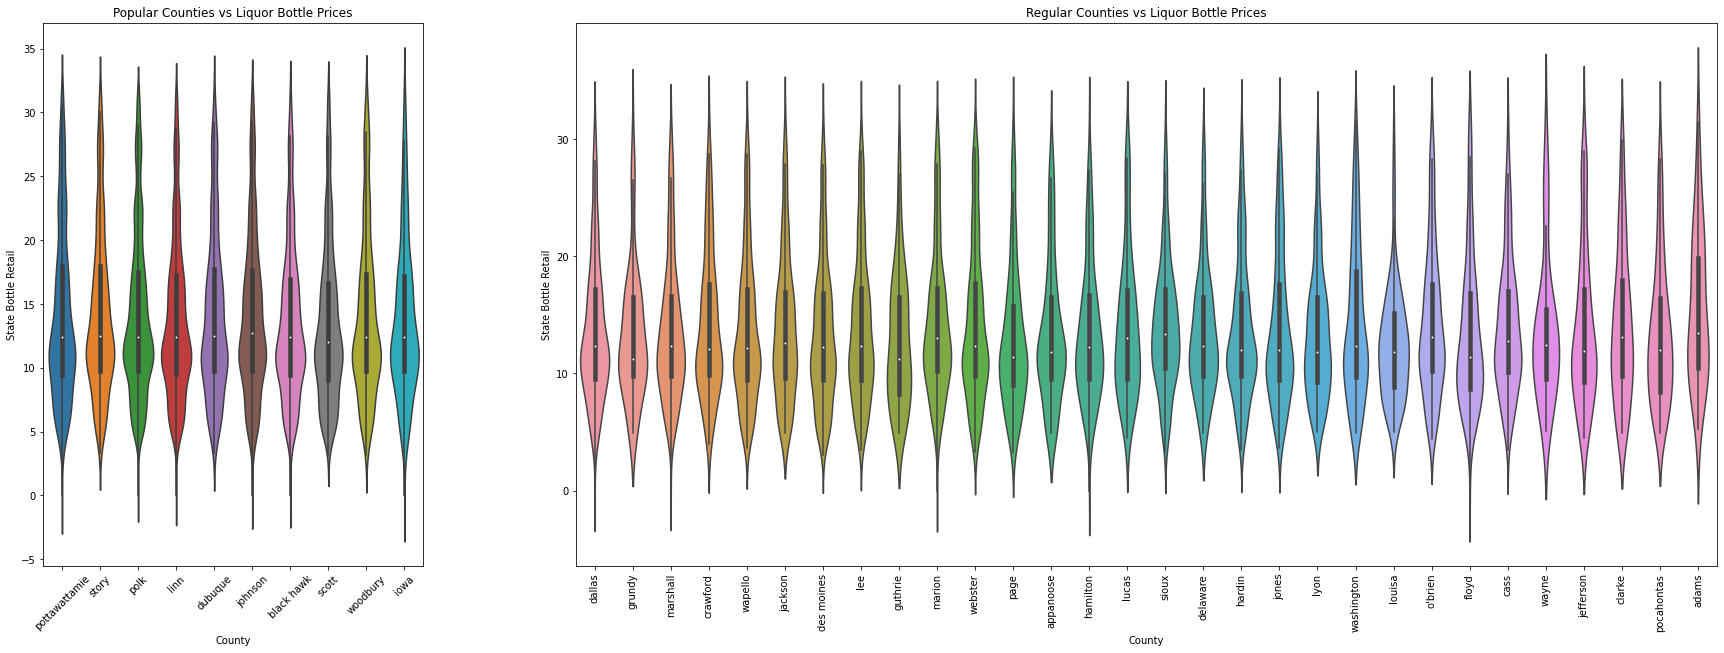

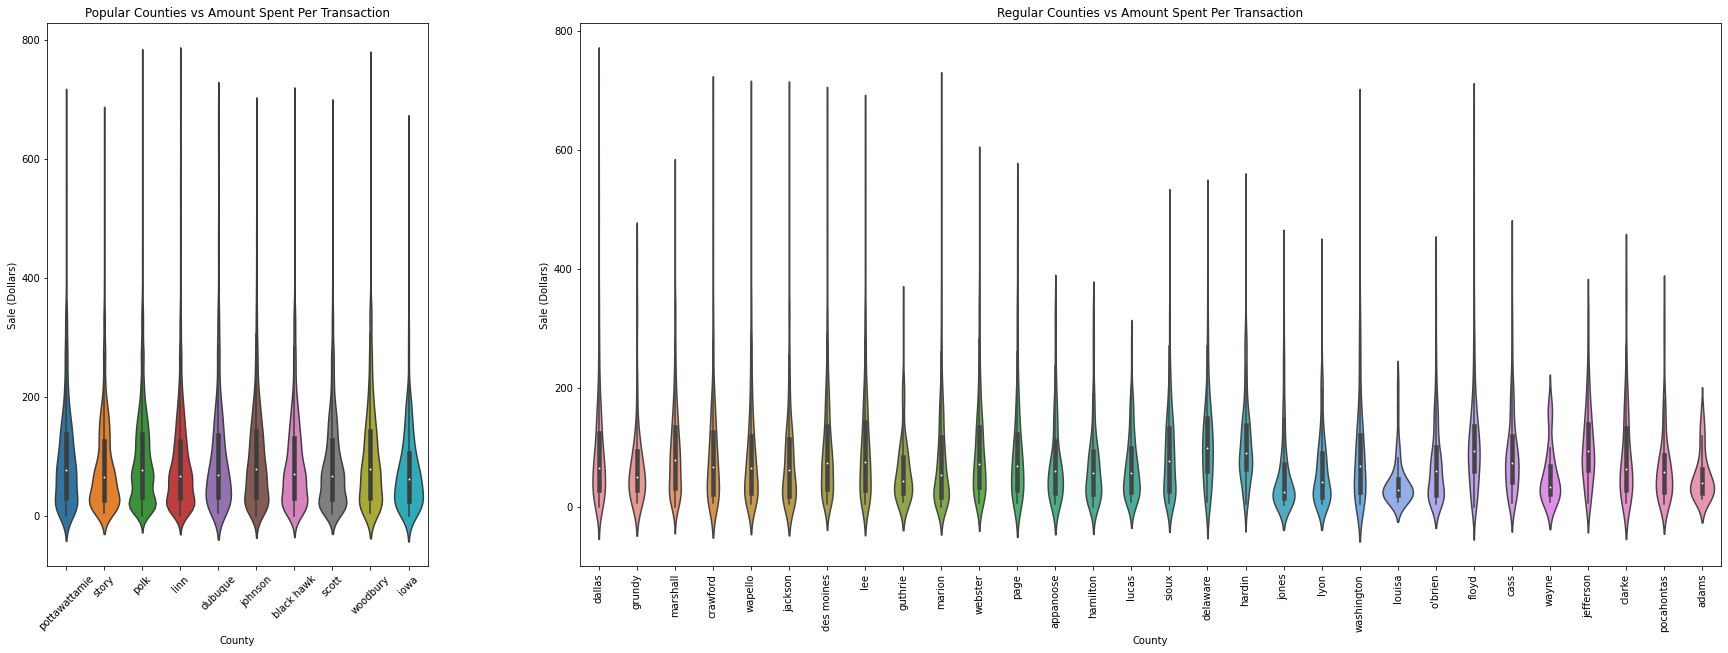

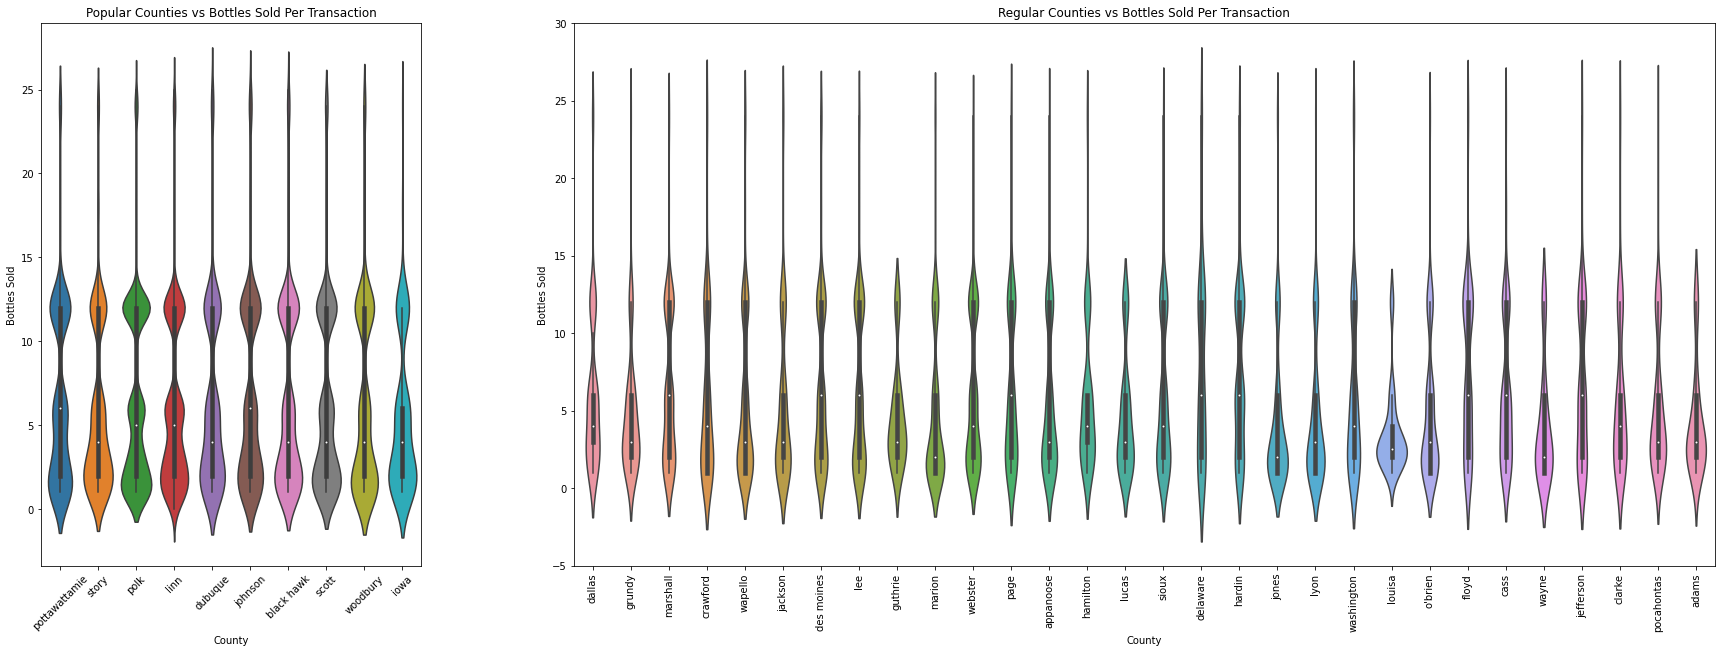

In [43]:
# %%%%%%%%%%%%%%%%%%%%% COUNTIES VS LIQUOR BOTTLE PRICES %%%%%%%%%%%%%%%%%%%%%
plot('State Bottle Retail', 'Liquor Bottle Prices')
# %%%%%%%%%%%%%%%% COUNTIES VS AMOUNT SPENT PER TRANSACTION %%%%%%%%%%%%%%%%
plot('Sale (Dollars)', 'Amount Spent Per Transaction')
# %%%%%%%%%%%%%%%% COUNTIES VS BOTTLES SOLD PER TRANSACTION %%%%%%%%%%%%%%%%
plot('Bottles Sold', 'Bottles Sold Per Transaction')


From the box plot on the left, which does **not** have outliers, we can see that the average price of a liquor bottle seems to stay consistent across various counties. What this means is that liquor stores across different counties probably do not significantly mark up or mark down the price of liquor.

From the box plot on the right, which **does** have outliers, we can see that there are a couple outlier `State Bottle Retail` attributes. Specifically, there is one transaction where a bottle sold for more than \$5000 and another transaction where a bottle sold for slightly less than \$1000. From the box plot on the left, we can see visually that most bottles of liquor are priced between \$10 and \$20

### **3.3 Plotting Sales Against Time**

In [44]:
data['month'] = pd.DatetimeIndex(data['Date']).month

In [45]:
from collections import defaultdict
month_dict = defaultdict(lambda: 0)

In [46]:
for date in data['Date']:
  month_dict[date.month-1]+=1

In [47]:
month_dict_df = pd.DataFrame(month_dict.items(), columns=["month", "total number of sales"])

In [48]:
month_dict_df

,month,total number of sales
0,10,4209
1,3,5196
2,1,4771
3,0,4838
4,5,5508
5,2,5099
6,9,5639
7,8,5188
8,4,5574
9,11,5461


In [49]:
data_nofliers['month'] = pd.DatetimeIndex(data_nofliers['Date']).month

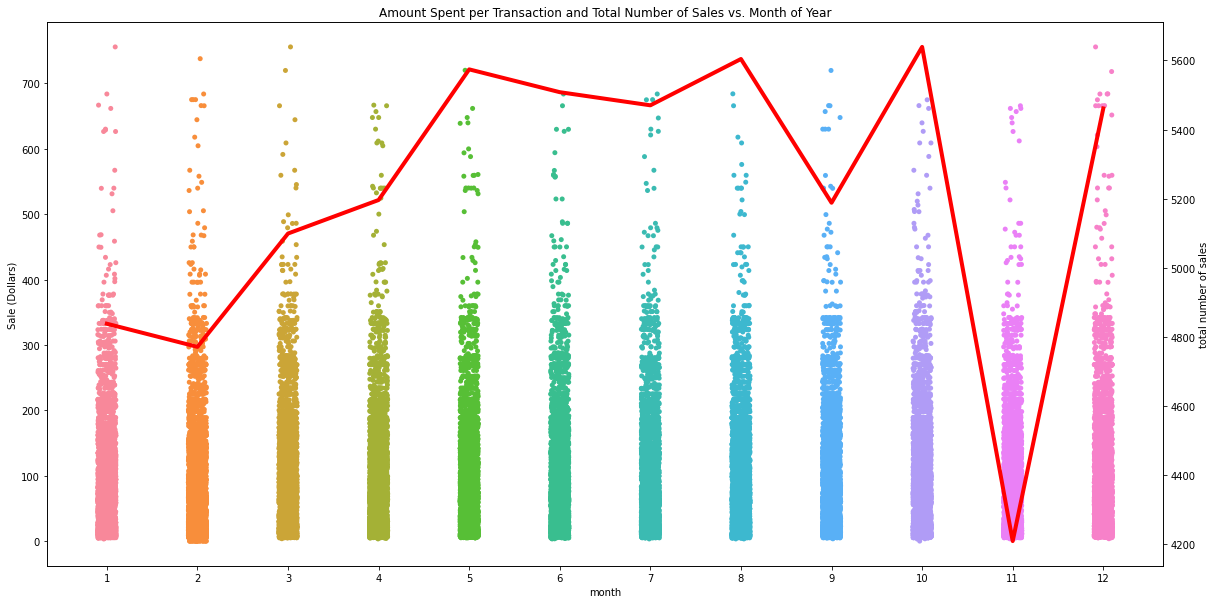

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
sns.stripplot(
  x = 'month',
  y = 'Sale (Dollars)',
  data = data_nofliers,

)
ax2 = ax.twinx()
sns.lineplot(
  x = 'month',
  y = 'total number of sales',
  data = month_dict_df,
  color = 'r',
  linewidth = 4
)
plt.title("Amount Spent per Transaction and Total Number of Sales vs. Month of Year")
plt.show()

**testing**

In [51]:
data_nofliers['year'] = pd.DatetimeIndex(data_nofliers['Date']).year

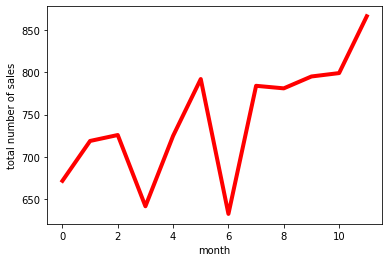

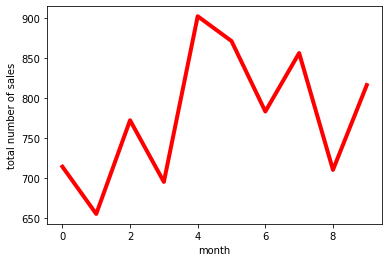

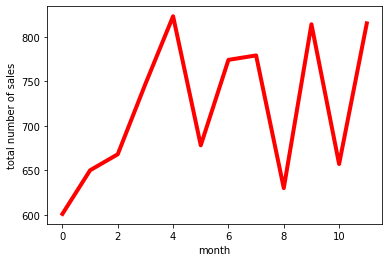

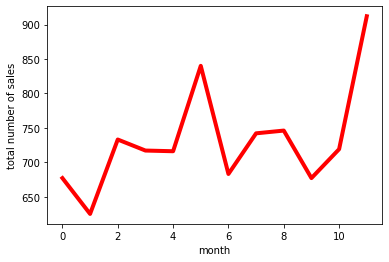

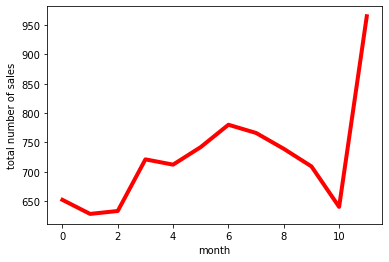

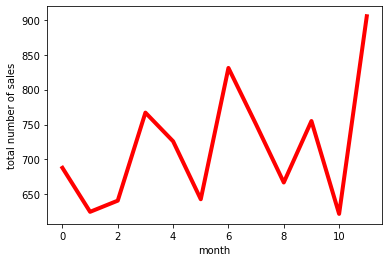

In [52]:
for year in data_nofliers['year'].unique():
  month_dict = defaultdict(lambda: 0)

  df = data_nofliers.loc[data_nofliers['year'] == year]
  for date in df['Date']:
    month_dict[date.month-1]+=1
  month_dict_df = pd.DataFrame(month_dict.items(), columns=["month", "total number of sales"])
  sns.lineplot(
    x = 'month',
    y = 'total number of sales',
    data = month_dict_df,
    color = 'r',
    linewidth = 4
  )
  plt.show()

## **Part 3: Hypothesis Testing**

Null Hypthothesis: We expect that liquor sales in all counties to to be the same <br>
Alternate Hypothesis: Liquor sales are different in at least 2 counties

In [53]:
target_counties_data = data_nofliers.loc[data_nofliers['County'].isin(target_counties)]

In [54]:
regular_counties_data = data_nofliers.loc[~data_nofliers['County'].isin(target_counties)]

In [55]:
target_counties_mean = np.mean(target_counties_data['Sale (Dollars)'])
regular_counties_mean = np.mean(regular_counties_data['Sale (Dollars)'])

In [56]:
y_bar = np.mean(
  pd.concat([target_counties_data, regular_counties_data])['Sale (Dollars)']
)
y_variance = np.var(
  pd.concat([target_counties_data, regular_counties_data])['Sale (Dollars)']
)

In [57]:
y_bar

90.5060043334961

In [58]:
y_variance

6980.31494140625

In [59]:
import math

In [60]:
mu = 0
sigma = math.sqrt(y_variance)

In [61]:
from scipy import stats

In [62]:
stats.norm(mu, sigma).cdf(
  abs(target_counties_mean - regular_counties_mean)
)

0.5565334499791773

## **Part 4: Machine Learning**

**Multiple Linear Regression**

In [63]:
ml_df = data[data.index.isin(data_nofliers.index)].copy()

In [64]:
ml_df['epoch'] = ml_df.Date.values.astype(np.int64) // 10 ** 9

**DATA PREPROCESSING**

In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
label_encoder = LabelEncoder()

In [67]:
cat_features = [
  'City', 
  'Zip Code', 
  'County Number', 
  'County', 
  'Vendor Number', 
  'Vendor Name',
  'month',
  'epoch'
]

In [68]:
ml_df2 = ml_df.copy()

In [69]:
for feature in cat_features:
  ml_df2[feature] = label_encoder.fit_transform(ml_df2[feature])

In [70]:
features = ml_df2.loc[:, [
  'City', 
  'Zip Code', 
  'County Number', 
  'County', 
  'Vendor Number', 
  'Vendor Name',
  'month',
  'epoch'
]]

In [71]:
target = ml_df2['Bottles Sold']

In [72]:
X = features
y = target

In [73]:
from sklearn.linear_model import LinearRegression

In [74]:
lin_reg = LinearRegression()
model = lin_reg.fit(X, y)

In [75]:
lin_reg.score(X,y)

0.08426505121429262

In [76]:
coefs = lin_reg.coef_.tolist()
for attr, coef in zip(features, coefs):
    print("Attribute: {}, Coefficient: {}".format(attr,coef))

Attribute: City, Coefficient: -0.0011038847709846638
Attribute: Zip Code, Coefficient: 9.302021671142276e-05
Attribute: County Number, Coefficient: 0.0011219373053431752
Attribute: County, Coefficient: 0.0011219373053431745
Attribute: Vendor Number, Coefficient: 0.0030947785054564656
Attribute: Vendor Name, Coefficient: -0.001418236194415901
Attribute: month, Coefficient: 0.002040029285446805
Attribute: epoch, Coefficient: -0.004022882859612213


**using onehot encoder**

In [77]:
# from sklearn.preprocessing import OneHotEncoder

# ml_df3 = ml_df.copy()

# for feature in cat_features:
#   ml_df3[feature] = label_encoder.fit_transform(ml_df3[feature])

# features = ml_df3.loc[:, [
#   'City', 
#   'Zip Code', 
#   'County Number', 
#   'County', 
#   'Vendor Number', 
#   'Vendor Name',
#   'month',
#   'epoch'
# ]]
# target = ml_df3['Sale (Dollars)']

# X = features
# y = target

# lin_reg = LinearRegression()
# model = lin_reg.fit(X,y)

# lin_reg.score(X,y)


**p-value with statsmodels**

In [78]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [79]:
ols_model = sm.OLS(y, X).fit()

In [80]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Bottles Sold   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.544
Method:                 Least Squares   F-statistic:                              8777.
Date:                Fri, 18 Dec 2020   Prob (F-statistic):                        0.00
Time:                        04:08:56   Log-Likelihood:                     -1.5901e+05
No. Observations:               51438   AIC:                                  3.180e+05
Df Residuals:                   51431   BIC:                                  3.181e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
City              0.0050      0.000     27.022      0.000       0.005       0.005
Zip Code          0.0034   8.98e-05     38.146      0.000       0.003       0.004
County Number     0.0192      0.000     52.009      0.000       0.018       0.020
County            0.0192      0.000     52.009      0.000       0.018       0.020
Vendor Number     0.0122      0.001     15.239      0.000       0.011       0.014
Vendor Name       0.0151      0.001     22.595      0.000       0.014       0.016
month             0.1872      0.007     28.416      0.000       0.174       0.200
epoch            -0.0022   5.94e-05    -37.858      0.000      -0.002      -0.002
==============================================================================
Omnibus:                     8791.941   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15192.459
Skew:                           1.118   Prob(JB):                         0.00
Kurtosis:                       4.445   Cond. No.                     1.56e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.52e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
features = ml_df2.loc[:, ['County Number', 'Vendor Number']]

In [82]:
target = ml_df2['Bottles Sold']

In [83]:
model = lin_reg.fit(X, y)

In [84]:
lin_reg.score(X, y)

0.08426505121429262